# ARMA models
Feb 23th 2021

In [60]:
import sys
print(sys.executable)
import numpy as np
import pandas as pd
import os
print(os.getcwd())
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.graphics.api import qqplot
# Custom functions:
from src.timeseriesFunctions import plot_time_series
pd.options.display.float_format = '{:,.2f}'.format
sns.set_context("paper", font_scale= 1.5)
plt.rcParams['axes.spines.right']= False
plt.rcParams['axes.spines.top']= False
plotsize = (13, 5)
plt.rcParams['figure.figsize']= plotsize

/home/razielar/miniconda3/envs/time-series/bin/python
/home/razielar/Documents/git_rep/Machine_learning/time_series_forecasting/coursera_time_series/week_3/1_arma_models


## 1) Autoregressive (AR) models

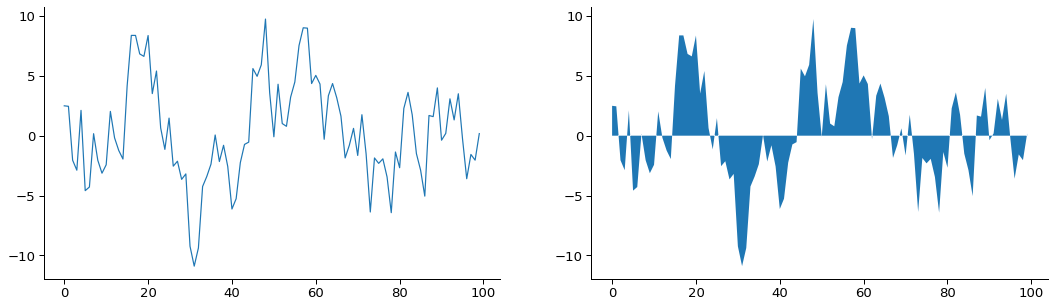

In [52]:
np.random.seed(123)

time= np.arange(100)
ar1_sample= np.zeros(100)
ar1_sample[0] += np.random.normal(loc= 0, scale= 2.5, size= 1)

for t in time:
    # AR model: using lags, betha= 0.7
    ar1_sample[t] = (0.7* ar1_sample[t-1]+ np.random.normal(loc= 0, scale= 2.5, size= 1))

# Plot:
fig, axes= plt.subplots(1,2)
fig.set_figwidth(18)

axes[0].plot(time, ar1_sample)
axes[1].fill_between(time, ar1_sample)

plt.show()

In [54]:
model= ARIMA(ar1_sample, order= (1,0,0)).fit()
# print(model.param_terms)
# print(model.param_names)
# print(model.params)
print("Betha-produced: 0.7\nBetha-estimated: {:.2f}".format(model.params[1]))

Betha-produced: 0.7
Betha-estimated: 0.73


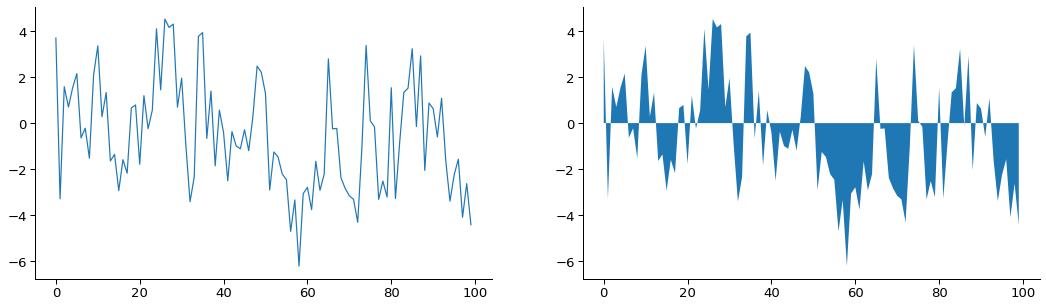

In [59]:
# Second estimation: 
np.random.seed(112)
# Mean is again 0
ar2_sample = np.zeros(100)

# Two random values:
ar2_sample[0:2] += np.random.normal(loc=0, scale=2.5, size=2)
# AR (2) with betha 0.3
for t in time[2:]:
    ar2_sample[t] = (0.3 * ar2_sample[t-1]) + (0.3 * ar2_sample[t-2]) + np.random.normal(loc=0, scale=2.5, size=1)
    
# Plot 
fig, axes= plt.subplots(1,2)
fig.set_figwidth(18)

axes[0].plot(time, ar2_sample)
axes[1].fill_between(time, ar2_sample)

plt.show()

In [65]:
model= ARIMA(ar2_sample, order= (2,0,0)).fit()
# print(model.params)
print("Betha-1: {:.4f} and Betha-2: {:.4f}".format(model.params[1], model.params[2]))

Betha-1: 0.3525 and Betha-2: 0.2333


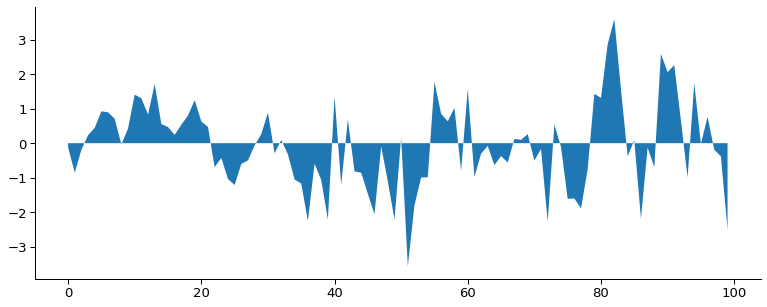

In [75]:
# Generate an AR dataset through arma_generate_sample
arparams = np.array([0.3,0.3])
maparams = np.array([0])
ar = np.r_[1, -arparams] # add zero-lag and negate, np.r_ is simply making it one array
ma = np.r_[1, maparams] # add zero-lag
y = arma_generate_sample(ar, ma, 100)

plt.fill_between(time,y)
plt.show()

In [74]:
model= ARIMA(y, order= (2,0,0)).fit()
print("Betha 1: {:.4f}, Betha 2: {:.4f}".format(model.params[1], model.params[2]) )

Betha 1: 0.1229, Betha 2: 0.3538


## 2) Moving Average (MA) models